# Imports

In [1]:
import pandas as pd
import os

# Load data

In [2]:
ds_df = pd.read_csv('./train_labels.csv')
ds_df.head()

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0


In [3]:
meta_df = pd.read_csv('./metadata.csv')
meta_df.head()

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train


# Explore data

## Stats

### train_labels.csv

In [8]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17060 entries, 0 to 17059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       17060 non-null  object 
 1   region    17060 non-null  object 
 2   severity  17060 non-null  int64  
 3   density   17060 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 533.2+ KB


In [7]:
ds_df.describe()

,severity,density
count,17060.000000,1.706000e+04
mean,2.145955,1.074537e+06
std,1.199942,6.836693e+06
min,1.000000,0.000000e+00
25%,1.000000,4.066000e+03
50%,2.000000,3.270975e+04
75%,3.000000,4.849192e+05
max,5.000000,8.046675e+08


In [6]:
ds_df['region'].value_counts()

south        9948
west         3769
midwest      2200
northeast    1143
Name: region, dtype: int64

<AxesSubplot: >

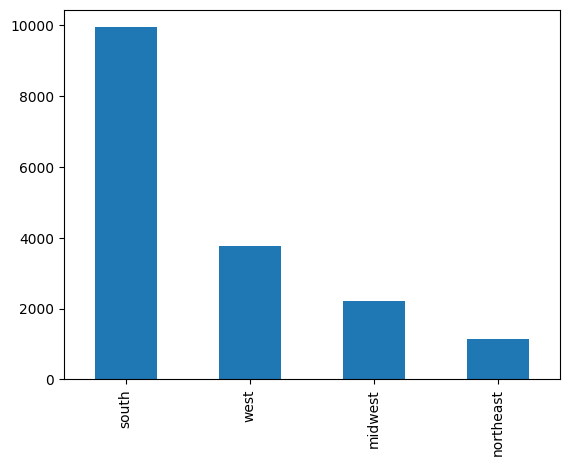

In [10]:
ds_df['region'].value_counts().plot(kind='bar')

In [11]:
ds_df['severity'].value_counts()

1    7497
4    3547
2    3239
3    2719
5      58
Name: severity, dtype: int64

<AxesSubplot: >

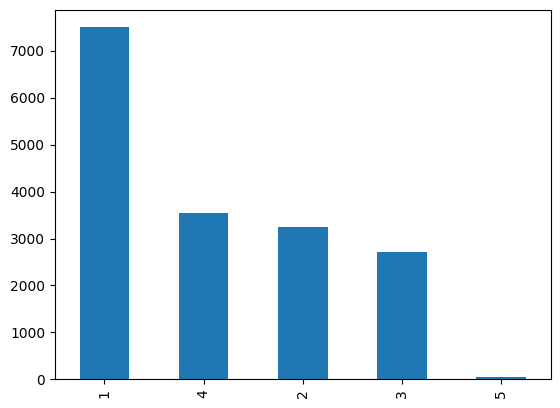

In [12]:
ds_df['severity'].value_counts().plot(kind='bar')

### metadata.csv

In [13]:
meta_df['split'].value_counts()

train    17060
test      6510
Name: split, dtype: int64

<AxesSubplot: >

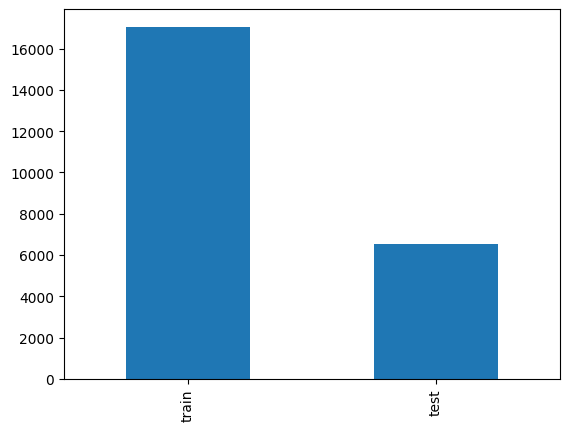

In [14]:
meta_df['split'].value_counts().plot(kind='bar')

In [15]:
merged_df = pd.merge(ds_df, meta_df, on='uid')
merged_df.head()

,uid,region,severity,density,latitude,longitude,date,split
0,aabm,midwest,1,585.0,39.080319,-86.430867,2018-05-14,train
1,aacd,south,1,290.0,35.875083,-78.878434,2020-11-19,train
2,aaee,south,1,1614.0,35.487000,-79.062133,2016-08-24,train
3,aaff,midwest,3,111825.0,38.049471,-99.827001,2019-07-23,train
4,aafl,midwest,4,2017313.0,39.474744,-86.898353,2021-08-23,train


## Sentinel-2